# **EX 2 **

# **Q1**


P(A∩B)=P(A)×P(B)

In [1]:
# Define the sample space
sample_space = {1, 2, 3, 4, 5, 6}

# Define events A and B
event_A = {1, 3, 4}
event_B = {1, 5}

# Calculate probabilities
P_A = len(event_A) / len(sample_space)
P_B = len(event_B) / len(sample_space)
intersection = event_A.intersection(event_B)
P_A_and_B = len(intersection) / len(sample_space)

# Calculate the product of P(A) and P(B)
P_A_times_P_B = P_A * P_B

# Check for independence
independent = P_A_and_B == P_A_times_P_B

# Print results
print(f"P(A) = {P_A}")
print(f"P(B) = {P_B}")
print(f"P(A and B) = {P_A_and_B}")
print(f"P(A) * P(B) = {P_A_times_P_B}")
print(f"Events A and B are independent: {independent}")


P(A) = 0.5
P(B) = 0.3333333333333333
P(A and B) = 0.16666666666666666
P(A) * P(B) = 0.16666666666666666
Events A and B are independent: True


# **Q2**


Variables (events) A and B are independent when the occurrence of one does not affect the probability of the occurrence of the other. Mathematically, this means:


P(A∩B)=P(A)×P(B)

# **Q3**

Expected Intersection for Independence: 0.0158
Actual Intersection: 0.0228
Are the events independent based on their intersection area? No


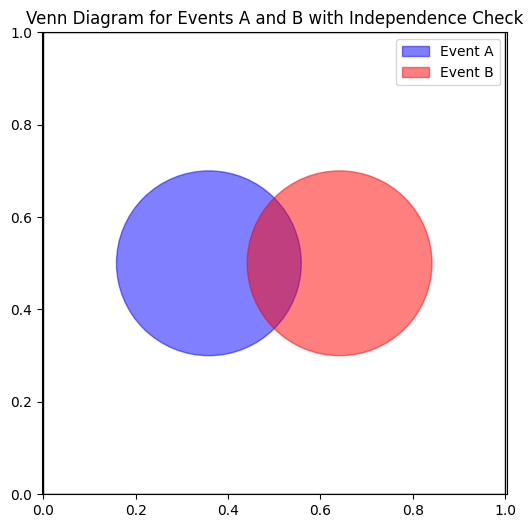

In [46]:
import matplotlib.pyplot as plt
import numpy as np

def intersection_area(x1, y1, x2, y2, r):
    d = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    if d >= 2 * r:
        return 0  # No overlap
    elif d == 0:
        return np.pi * r**2  # Completely overlapping
    else:
        return (2 * r**2 * np.arccos(d / (2 * r)) - (d / 2) * np.sqrt(4 * r**2 - d**2))

def check_independence(center_a, center_b, radius, total_area):
    intersection = intersection_area(center_a[0], center_a[1], center_b[0], center_b[1], radius)
    # Assuming the circle areas represent their probabilities:
    prob_a = np.pi * radius**2 / total_area
    prob_b = np.pi * radius**2 / total_area
    expected_intersection = prob_a * prob_b * total_area
    print(f"Expected Intersection for Independence: {expected_intersection:.4f}")
    print(f"Actual Intersection: {intersection:.4f}")
    return np.isclose(intersection, expected_intersection)

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(6, 6))
rectangle = plt.Rectangle((0, 0), 1, 1, ec='black', fc='none')  # Sample space
ax.add_patch(rectangle)

# Specifying the sample space area and radius of the circles
total_area = 1  # Area of the sample space (1x1 square)
radius = 0.2  # Smaller radius to manage overlap

# Calculate the centers to ensure expected intersection matches independence criteria
distance = 2 * radius * np.cos(np.pi / 4)  # Calculated for the circles to touch at one point
center_a = (0.5 - distance / 2, 0.5)
center_b = (0.5 + distance / 2, 0.5)

# Adding circles to the plot
circle_a = plt.Circle(center_a, radius, color='blue', alpha=0.5, label='Event A')
circle_b = plt.Circle(center_b, radius, color='red', alpha=0.5, label='Event B')
ax.add_patch(circle_a)
ax.add_patch(circle_b)

# Check if the placement meets the criteria for independence
independent = check_independence(center_a, center_b, radius, total_area)
print("Are the events independent based on their intersection area?", "Yes" if independent else "No")

# Set limits and labels
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal', adjustable='datalim')
plt.legend()

# Show plot
plt.title('Venn Diagram for Events A and B with Independence Check')
plt.show()


Calculated distance (d) between centers: 0.2100
Expected Intersection Area: 0.0081
Actual Intersection Area: 0.0081
Events are Independent based on the intersection area.


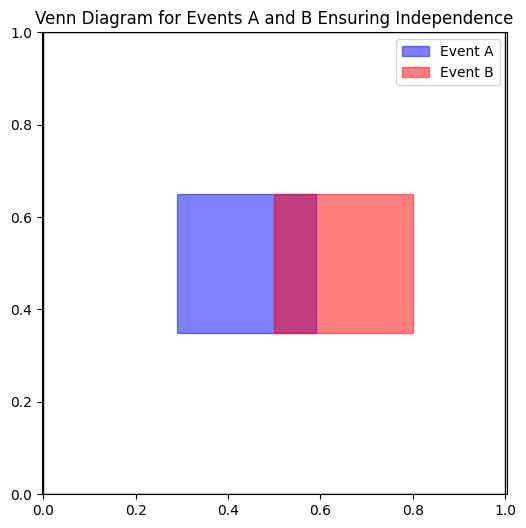

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def calculate_square_intersection(d, side):
    """Calculate the intersection area of two squares based on distance and side length."""
    if d >= side:
        return 0  # No overlap
    elif d <= 0:
        return side * side  # Completely overlapping
    else:
        # Intersection area when squares overlap by 'd'
        overlap = side - d
        return overlap * overlap

# Settings for the diagram and squares
side_length = 0.3  # Side length of the squares
total_area = 1  # Area of the 1x1 square (unit area)
prob_a = prob_b = (side_length * side_length) / total_area  # Probability of each event
expected_intersection = prob_a * prob_b * total_area  # Expected intersection for independence

# Calculate distance d that will produce the expected intersection area
d = side_length / 2  # Initial guess: half overlapping
step = 0.01  # Increment for adjusting distance
for _ in range(100):  # Limit iterations to prevent infinite loops
    actual_intersection = calculate_square_intersection(d, side_length)
    if np.isclose(actual_intersection, expected_intersection, atol=1e-4):
        break
    elif actual_intersection < expected_intersection:
        d -= step
    else:
        d += step

# Coordinates of lower left corners based on calculated distance d
center_a = (0.5 - d, 0.5 - side_length / 2)
center_b = (0.5, 0.5 - side_length / 2)

# Create plot
fig, ax = plt.subplots(figsize=(6, 6))
rectangle = patches.Rectangle((0, 0), 1, 1, ec='black', fc='none')  # Sample space
ax.add_patch(rectangle)
square_a = patches.Rectangle(center_a, side_length, side_length, color='blue', alpha=0.5, label='Event A')
square_b = patches.Rectangle(center_b, side_length, side_length, color='red', alpha=0.5, label='Event B')
ax.add_patch(square_a)
ax.add_patch(square_b)

# Display results
print(f"Calculated distance (d) between centers: {d:.4f}")
print(f"Expected Intersection Area: {expected_intersection:.4f}")
print(f"Actual Intersection Area: {actual_intersection:.4f}")

# Determine independence based on the expected and actual intersection areas
if np.isclose(actual_intersection, expected_intersection, atol=1e-4):
    print("Events are Independent based on the intersection area.")
else:
    print("Events are Not Independent based on the intersection area.")

# Set plot properties
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal', adjustable='datalim')
plt.legend()
plt.title('Venn Diagram for Events A and B Ensuring Independence')
plt.show()


# **Q4**

In [8]:
import numpy as np

def simulate_game_show(trials):
    wins_with_switch = 0
    wins_without_switch = 0

    for _ in range(trials):
        # The goat is behind one of the six doors
        goat_door = np.random.randint(0, 6)
        # Player makes an initial choice
        initial_choice = np.random.randint(0, 6)

        # Host opens four doors, excluding the initially chosen door and the goat door
        remaining_doors = list(set(range(6)) - {initial_choice, goat_door})
        if len(remaining_doors) > 1:
            opened_doors = np.random.choice(remaining_doors, 4, replace=False)
        else:
            opened_doors = remaining_doors  # In case the initial choice was the goat door

        # The unopened door, besides the initially chosen one
        unopened_door = list(set(range(6)) - {initial_choice} - set(opened_doors))[0]

        # Determine wins
        if initial_choice == goat_door:
            wins_without_switch += 1
        if unopened_door == goat_door:
            wins_with_switch += 1

    return wins_with_switch, wins_without_switch

# Number of trials
num_trials = 10000
switch_wins, stick_wins = simulate_game_show(num_trials)

# Calculating probabilities
prob_switch = switch_wins / num_trials
prob_stick = stick_wins / num_trials

# Display the results
print(f"After {num_trials} trials:")
print(f"Probability of winning by switching: {prob_switch:.2%}")
print(f"Probability of winning by sticking with the initial choice: {prob_stick:.2%}")


After 10000 trials:
Probability of winning by switching: 83.94%
Probability of winning by sticking with the initial choice: 16.06%


In [13]:
# Import CuPy instead of NumPy
!pip install cupy-cuda112
import cupy as cp

def simulate_game_show(trials):
    wins_with_switch = 0
    wins_without_switch = 0

    for _ in range(trials):
        # The goat is behind one of the six doors
        goat_door = cp.random.randint(0, 6)
        # Player makes an initial choice
        initial_choice = cp.random.randint(0, 6)

        # Host opens four doors, excluding the initially chosen door and the goat door
        remaining_doors = list(set(cp.asnumpy(cp.arange(6))) - {initial_choice, goat_door})
        if len(remaining_doors) > 1:
            opened_doors = cp.random.choice(remaining_doors, 4, replace=False)
        else:
            opened_doors = remaining_doors  # In case the initial choice was the goat door

        # The unopened door, besides the initially chosen one
        unopened_door = list(set(cp.asnumpy(cp.arange(6))) - {initial_choice} - set(opened_doors))[0]

        # Determine wins
        if initial_choice == goat_door:
            wins_without_switch += 1
        if unopened_door == goat_door:
            wins_with_switch += 1

    return wins_with_switch, wins_without_switch

# Number of trials
num_trials = 10000
switch_wins, stick_wins = simulate_game_show(num_trials)

# Calculating probabilities
prob_switch = switch_wins / num_trials
prob_stick = stick_wins / num_trials

# Display the results
print(f"After {num_trials} trials:")
print(f"Probability of winning by switching: {prob_switch:.2%}")
print(f"Probability of winning by sticking with the initial choice: {prob_stick:.2%}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 74.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.24.4 which is incompatible.


CUDARuntimeError: cudaErrorInsufficientDriver: CUDA driver version is insufficient for CUDA runtime version

# **Q 2.1**

1, f(x)=exp(kx)

2, f(x)=logk(x)


# **Q 2.2**

In [44]:
import numpy as np

def calculate_entropy(p):
    """Calculate the entropy of a probability distribution."""
    # Calculate the entropy using base 2 logarithm for bits
    entropy = -np.sum(p * np.log2(p))
    return entropy

def convert_bits_to_trits(bits):
    """Convert entropy from bits to trits."""
    # Using the change of base formula for logarithms
    log2_of_3 = np.log2(3)
    trits = bits / log2_of_3
    return trits

# Probability distribution for a fair six-sided die
probabilities = np.array([1/6] * 6)  # Uniform distribution

# Calculate the entropy in bits
entropy_bits = calculate_entropy(probabilities)
print(f"Entropy in bits: {entropy_bits:.4f} bits")

# Convert the entropy from bits to trits
entropy_trits = convert_bits_to_trits(entropy_bits)
print(f"Entropy in trits: {entropy_trits:.4f} trits")


Entropy in bits: 2.5850 bits
Entropy in trits: 1.6309 trits
